In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sklearn.model_selection as skl

In [61]:
def sigmoid(w,b,x):
    res = 1.0 /(1 + np.exp(-(np.dot(w.T,x)[0] + b)))
    return res

def grad_w(w,b,x,y):
    f = sigmoid(w,b,x)
    return (f - y) * f * (1 - f) * x

def grad_b(w,b,x,y):
    f = sigmoid(w,b,x)
    return (f - y) * f * (1 - f)

def predict(w,b,x):
    y = sigmoid(w, b, x)
    if y < 0.5:
        return 0
    else:
        return 1
    
def grad_desc(c1,c2):
    itr = 0
    eta = 0.1
    epochs = 1000
    W = np.random.rand(1,c1.shape[1]-1).T
    B = np.random.rand()
    
    # print(W.shape)
    
    errors = []
    
    while itr < epochs:
        dw = 0
        db = 0
        cnt_err = 0
        
        c1["class"] = 1
        c2["class"] = 0
        all_data = pd.concat([c1,c2]).sample(frac=1).reset_index(drop=True)
        
        Class = all_data.pop("class")
        
        for i in range(all_data.shape[0]):
            x = np.array(all_data.iloc[i]).reshape(2,1)
            y = Class.iloc[i]
            
            dw += grad_w(W,B,x,y)
            db += grad_b(W,B,x,y)
            cnt_err += 1 if predict(W,B,x) != y else 0
            
        
        W = W - eta * dw
        B = B - eta * db

        errors.append(cnt_err)
        if(cnt_err == 0):
            break
        
        print("Epoch:",itr, "Error=> ", (cnt_err * 100)/(all_data.shape[0]), "%")
        itr+=1
            
    
    plt.bar(x = np.arange(1, len(errors)+1), height = errors)
    plt.xlabel('epoch')
    plt.ylabel('misclassification count')  
    
    return W,B

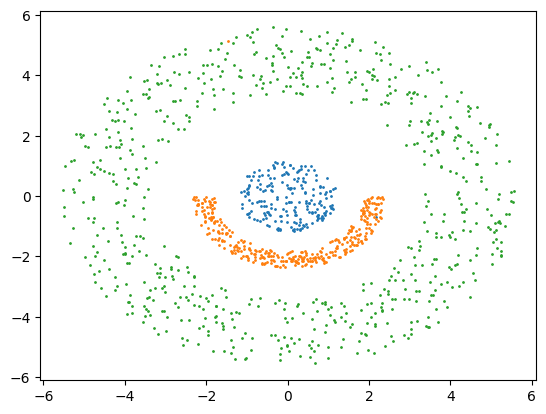

In [62]:
df = pd.read_csv("./Data/Classification/NLS_Group03.txt", header = None, names = ["x", "y"], skiprows = 1, sep = ' ')
index = df.reset_index(inplace = True)
df.columns = ['x', 'y', 'non']
df.drop('non', axis = 1, inplace = True)

cls1_data, cls2_data, cls3_data = df.iloc[:300], df.iloc[300:800], df.iloc[800:1800]

cls1_data_train, cls1_data_test = skl.train_test_split(cls1_data, test_size = 0.3, train_size = 0.7)
cls2_data_train, cls2_data_test = skl.train_test_split(cls2_data, test_size = 0.3, train_size = 0.7)
cls3_data_train, cls3_data_test = skl.train_test_split(cls3_data, test_size = 0.3, train_size = 0.7)
x_min, x_max = df.iloc[:, 0].min() - 1, df.iloc[:, 0].max() + 1
y_min, y_max = df.iloc[:, 1].min() - 1, df.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, axes = plt.subplots()
axes.scatter(cls1_data_train['x'], cls1_data_train['y'], label = 'class 1',s=1)
axes.scatter(cls2_data_train['x'], cls2_data_train['y'], label = 'class 2',s=1)
axes.scatter(cls3_data_train['x'], cls3_data_train['y'], label = 'class 3',s=1)

# 300 - class1
# 500 - class2
# 1000 - class3

/tmp/ipykernel_205460/25227487.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1["class"] = 1
/tmp/ipykernel_205460/25227487.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c2["class"] = 0


Epoch: 0 Error=>  41.5 %
Epoch: 1 Error=>  27.125 %
Epoch: 2 Error=>  25.625 %
Epoch: 3 Error=>  23.125 %
Epoch: 4 Error=>  22.0 %
Epoch: 5 Error=>  21.0 %
Epoch: 6 Error=>  20.75 %
Epoch: 7 Error=>  21.625 %
Epoch: 8 Error=>  22.125 %
Epoch: 9 Error=>  21.625 %
Epoch: 10 Error=>  21.5 %
Epoch: 11 Error=>  21.0 %
Epoch: 12 Error=>  21.25 %
Epoch: 13 Error=>  21.625 %
Epoch: 14 Error=>  21.75 %
Epoch: 15 Error=>  22.375 %
Epoch: 16 Error=>  22.75 %
Epoch: 17 Error=>  22.875 %
Epoch: 18 Error=>  22.875 %
Epoch: 19 Error=>  22.875 %
Epoch: 20 Error=>  23.0 %
Epoch: 21 Error=>  23.0 %
Epoch: 22 Error=>  22.875 %
Epoch: 23 Error=>  22.625 %
Epoch: 24 Error=>  22.75 %
Epoch: 25 Error=>  22.625 %
Epoch: 26 Error=>  22.625 %
Epoch: 27 Error=>  22.625 %
Epoch: 28 Error=>  22.75 %
Epoch: 29 Error=>  22.875 %
Epoch: 30 Error=>  22.875 %
Epoch: 31 Error=>  23.125 %
Epoch: 32 Error=>  23.0 %
Epoch: 33 Error=>  23.0 %
Epoch: 34 Error=>  22.875 %
Epoch: 35 Error=>  23.0 %
Epoch: 36 Error=>  22.875 %


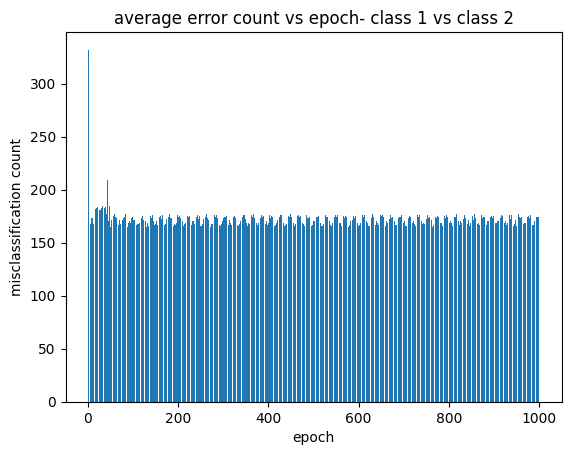

In [65]:
# Class1 vs Class2
w_12, b_12 = grad_desc(cls1_data,cls2_data)
plt.title('average error count vs epoch- class 1 vs class 2')
plt.show()


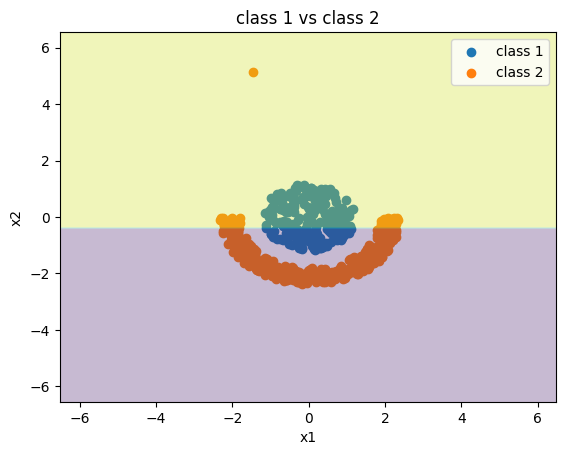

In [64]:

# create a mesh to plot in
x_min, x_max = df.iloc[:, 0].min() - 1, df.iloc[:, 0].max() + 1
y_min, y_max = df.iloc[:, 1].min() - 1, df.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, axes = plt.subplots()
axes.scatter(cls1_data_train['x'], cls1_data_train['y'], label = 'class 1')
axes.scatter(cls2_data_train['x'], cls2_data_train['y'], label = 'class 2')

# Prediction using perceptron model
Z = np.array([predict(w_12, b_12, x) for x in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

# Plot the decision regions
plt.contourf(xx, yy, Z, alpha=0.3)

plt.title('class 1 vs class 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.show()